# 如何模拟奥恩斯坦-乌伦贝克过程

### 1. 先明确描述奥恩斯坦-乌伦贝克过程的数学表达式：

$$dx_t = \theta(\mu-x_t)dt + \sigma dW_t$$

* $x_t$ 表示随机变量在时刻 $t$ 的值
* $\theta$ 是回归参数，表示过程回复到均值的速度
* $\mu$ 是均值，表示过程的长期平均水平
* $d_t$ 是时间步长
* $\sigma$ 是随机项的标准差，表示随机波动的大小
* $dW_t$ 是标准布朗运动的增量，表示随机项

在离散模式下，可以使用欧拉方法（Euler method）进行数值模拟，公式如下：

$$x_{t+1} = x_{t} + \theta(\mu-x_t)dt + \sigma\sqrt{dt}Z$$

其中：

* $Z$ 是标准正态分布的随机数，用来模拟布朗运动的增量

上述公式可以简单理解为：在这个随机过程中，随机变量 $x_t$ 不断向长期均值回复，同时收到随机干扰的影响。

### 2. 用 python 实现

### 3. 可视化

调整模型参数，看看它们如何影响模拟的结果。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def ornstein_uhlenbeck(
    x0: float, theta: float, mu: float, sigma: float, dt: float, T: float
) -> tuple[np.array, np.array]:
    """Simulate Ornstein-Uhlenbeck process

    Params:
        x0 (float): initial value
        theta (float): regression coefficient
        mu (float): long-term average level
        sigma (float): stdev of random term
        dt (float): time step
        T (float): total simulation time

    Returns:
        tuple of (x, t)
        x: array of simulation values
        t: array of time values
    """
    num_steps = int(T / dt)
    x = np.zeros(num_steps + 1)
    t = np.linspace(0, T, num_steps + 1)

    x[0] = x0
    for i in range(1, num_steps + 1):
        dW = np.random.normal(loc=0, scale=np.sqrt(dt))
        x[i] = x[i - 1] + theta * (mu - x[i - 1]) * dt + sigma * dW

    return x, t

In [21]:
x0 = 0.0
theta = 0.05
mu = 0.0
sigma = 0.05
dt = 0.01
T = 100

x, t = ornstein_uhlenbeck(x0, theta, mu, sigma, dt, T)

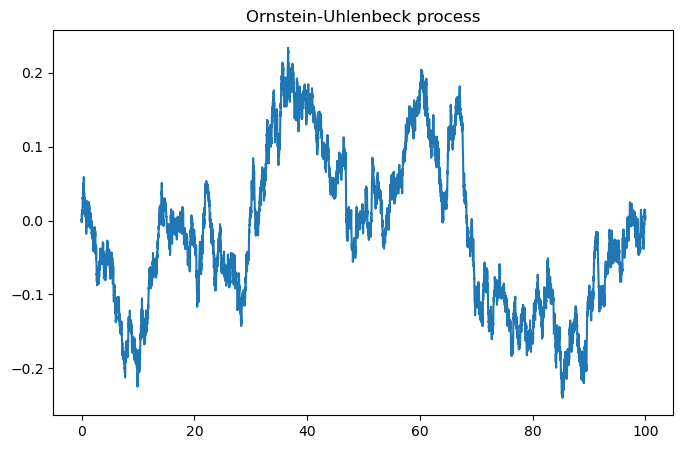

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=t, y=x, ax=ax)
_ = ax.set(title="Ornstein-Uhlenbeck process")

模型参数如何影响模拟结果？

奥恩斯坦-乌伦贝克过程与几何布朗运动有哪些异同？